In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/ML Algorithms/Linear Regression/Real estate.csv")

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.duplicated().value_counts()

,count
False,414


In [ ]:
df = df.drop_duplicates()

In [ ]:
corr_matrix = df.corrwith(df["Y house price of unit area"])

In [ ]:
corr_matrix

,0
No,-0.028587
X1 transaction date,0.087491
X2 house age,-0.210567
X3 distance to the nearest MRT station,-0.673613
X4 number of convenience stores,0.571005
X5 latitude,0.546307
X6 longitude,0.523287
Y house price of unit area,1.000000


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'No'),
  Text(1, 0, 'X1 transaction date'),
  Text(2, 0, 'X2 house age'),
  Text(3, 0, 'X3 distance to the nearest MRT station'),
  Text(4, 0, 'X4 number of convenience stores'),
  Text(5, 0, 'X5 latitude'),
  Text(6, 0, 'X6 longitude'),
  Text(7, 0, 'Y house price of unit area')])

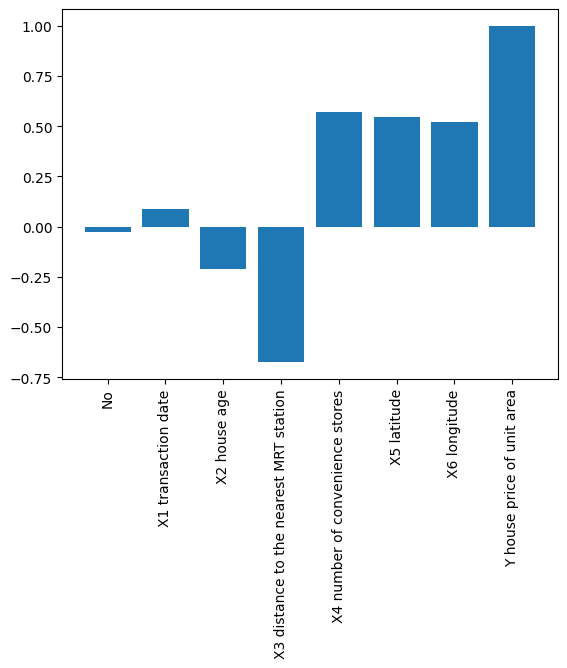

In [ ]:
import matplotlib.pyplot as plt
x = corr_matrix.index
y = corr_matrix.values
plt.bar(x,y)
plt.xticks(rotation = 90)

In [ ]:
df["X2 house age"].unique()

array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 35.8,  4.9,  6.5, 30.7, 11.6,
       15.5, 16. , 13.7, 28.2, 27.6,  8.4, 24. ,  3.6,  4.3, 30.2, 33. ,
       13.1, 14. , 26.9, 13.5, 17. , 14.1, 20.9, 16.3, 35.3, 43.8,  9.7,
       15.2, 22.8, 34. , 18.2, 17.4, 38.3, 15.6, 12

In [ ]:
df["X3 distance to the nearest MRT station"].unique()

array([  84.87882,  306.5947 ,  561.9845 ,  390.5684 , 2175.03   ,
        623.4731 ,  287.6025 , 5512.038  , 1783.18   ,  405.2134 ,
         90.45606,  492.2313 , 2469.645  , 1164.838  ,  579.2083 ,
        292.9978 ,  350.8515 ,  368.1363 ,   23.38284, 2275.877  ,
        279.1726 , 1360.139  ,  480.6977 , 1487.868  ,  383.8624 ,
        276.449  ,  557.478  ,  451.2438 , 4519.69   ,  769.4034 ,
        488.5727 ,  323.655  ,  205.367  , 4079.418  , 1935.009  ,
        577.9615 ,  289.3248 , 4082.015  , 4066.587  ,  519.4617 ,
        512.7871 ,  533.4762 ,  488.8193 ,  463.9623 ,  640.7391 ,
       4605.749  , 4510.359  ,  512.5487 , 1758.406  , 1438.579  ,
       1160.632  ,  371.2495 ,   56.47425,  336.0532 , 1931.207  ,
        259.6607 , 2175.877  ,  995.7554 ,  123.7429 ,  193.5845 ,
        104.8101 ,  464.223  ,  424.5442 ,  379.5575 ,  616.4004 ,
       2185.128  ,  552.4371 , 1414.837  ,  377.7956 ,  150.9347 ,
       2707.392  ,  383.2805 ,  338.9679 , 1455.798  , 1406.43

In [ ]:
del df["No"]

In [ ]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
x = df.iloc[:,:6]
y = df.iloc[:,6]

In [ ]:
x

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067


In [ ]:
y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
302,2013.500,16.5,2288.01100,3,24.95885,121.51359
20,2013.417,4.5,2275.87700,3,24.96314,121.51151
303,2013.500,38.3,439.71050,0,24.97161,121.53423
142,2013.417,19.8,640.60710,5,24.97017,121.54647
14,2013.500,13.2,1164.83800,4,24.99156,121.53406
...,...,...,...,...,...,...
323,2013.417,28.6,197.13380,6,24.97631,121.54436
192,2013.167,43.8,57.58945,7,24.96750,121.54069
117,2013.000,13.6,4197.34900,0,24.93885,121.50383
47,2013.583,35.9,640.73910,3,24.97563,121.53715


In [ ]:
x_test

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
356,2012.833,10.3,211.4473,1,24.97417,121.52999
170,2013.333,24.0,4527.6870,0,24.94741,121.49628
224,2013.333,34.5,324.9419,6,24.97814,121.54170
331,2013.333,25.6,4519.6900,0,24.94826,121.49587
306,2013.500,14.4,169.9803,1,24.97369,121.52979
...,...,...,...,...,...,...
308,2013.417,16.4,289.3248,5,24.98203,121.54348
100,2013.500,17.5,964.7496,4,24.98872,121.53411
7,2013.417,20.3,287.6025,6,24.98042,121.54228
22,2012.917,14.7,1360.1390,1,24.95204,121.54842


In [ ]:
y_train

,Y house price of unit area
302,23.2
20,29.3
303,38.4
142,37.5
14,34.3
...,...
323,42.5
192,42.7
117,13.0
47,61.5


In [ ]:
y_test

,Y house price of unit area
356,45.3
170,14.4
224,46.0
331,15.6
306,50.2
...,...
308,53.0
100,38.2
7,46.7
22,24.6


In [ ]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# x_train = ss.fit_transform(x_train)
# x_test = ss.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([40.09548022, 12.83819172, 42.00966923, 12.64733002, 42.44343803,
       39.83198984, 40.55595745, 33.86023762, 49.37328265, 45.87031976,
       45.86310332, 40.64517161, 39.50676203, 40.04955455, 47.11860745,
       38.13995857, 40.08417262, 41.12540438, 40.83964717, 42.37860913,
       49.70003677, 31.08231285, 39.67622569, 45.52764709, 46.18872415,
       43.43143246, 46.35880414, 26.20749681, 48.13688227, 21.53997799,
       44.8104349 , 34.94131598, 42.6644548 , 38.37379621, 43.98018394,
       32.28477958, 47.62406077, 39.77407301, 52.55712201,  7.46443039,
       52.54110472, 33.1285138 , 34.22107416, 49.59242876, 15.37567885,
       43.36042455, 42.40643117, 12.9983919 , 33.99155573, 48.50179814,
       53.67150141, 38.73047082, 47.73879852, 25.42163729, 30.68691477,
       34.27187582, 48.91161249, 40.61983209, 43.45816985, 32.95307348,
       43.85237072, 43.62659423, 39.55165632, 47.0209757 , 36.84017788,
       30.00963218,  9.66438363, 34.92190591, 46.16892784, 39.83

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
score01 = r2_score(y_test, y_pred)
score01

0.6573242742217953

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print(mse(y_test, y_pred))

59.522435319026265


In [ ]:
training_score = lr.score(x_train, y_train)
training_score

0.5648053492261595

In [ ]:
testing_score = lr.score(x_test, y_test)
testing_score

0.6573242742217953

In [ ]:
new_y = lr.predict([[2024.0000,11,12,2,10.76670531954859, 76.46504862917696]])
new_y

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-2798.93523469])